EDA for community dataset

1. Dataset Overview:
Total number of incidents: 121
Columns: ['case_#', 'shooter_last_name', 'shooter_first_name', 'location_(code)', 'location_(specify)', 'shooting_start_time', 'shooting_end_time', 'time_of_day', 'zip_code', 'total_population', 'median_age', '%_white_alone', '%_female_household', '%_rental_units', '%_employed', '%_high_school_graduate', '%_college_graduate', '%_without_health_insurance', 'nearest_hospital_(miles)', 'n_mental_health_providers_in_zip_code', 'n_gun_stores_in_zip_code', 'size_of_police_dept', 'homicide_rate']

2. Missing Data Overview:
Series([], dtype: float64)

3. Location Type Distribution:
location_(specify)
Workplace                                                      29
Retail                                                         21
Restaurant / Bar / Nightclub                                   14
House of Worship                                               10
K-12 School                                                     9
College / Universi

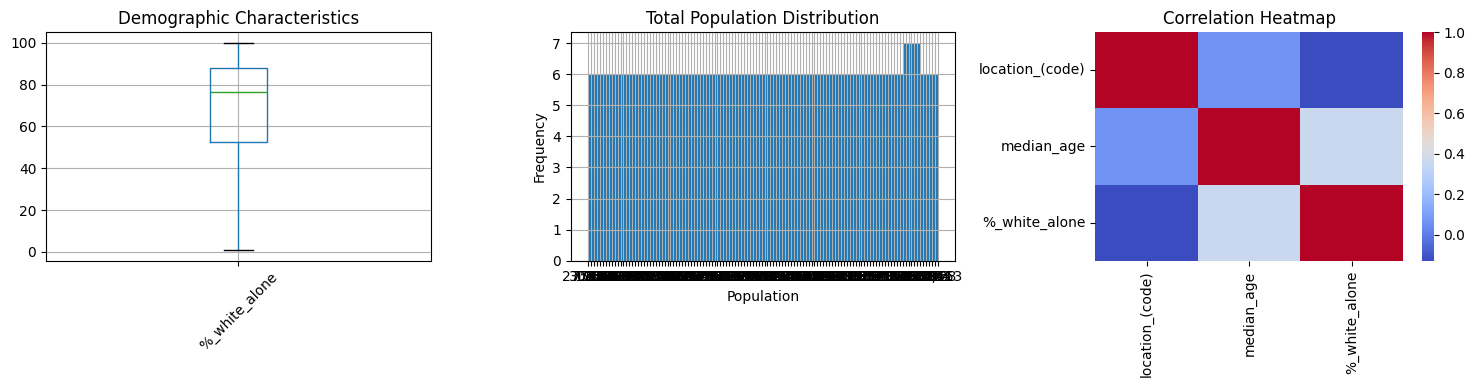


6. Statistical Summary of Numeric Columns:
       location_(code)  median_age  %_white_alone
count       121.000000  121.000000     121.000000
mean          4.528926   35.909091      69.080496
std           2.152806    6.205199      24.223734
min           0.000000   21.900000       0.800000
25%           3.000000   32.400000      52.700000
50%           5.000000   35.800000      76.500000
75%           6.000000   39.500000      87.700000
max           8.000000   57.500000     100.000000

7. Shooter Analysis:
Total unique shooters: 118
Top 5 repeated last names:
shooter_last_name
Thornton      2
Long          2
Vang          2
Abdulazeez    1
Regalado      1
dtype: int64


ValueError: could not convert string to float: '25,463'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_community_data.csv')

def perform_eda(dataframe):
    # 1. Basic Dataset Information
    print("1. Dataset Overview:")
    print(f"Total number of incidents: {len(dataframe)}")
    print(f"Columns: {list(dataframe.columns)}\n")

    # 2. Missing Data Analysis
    print("2. Missing Data Overview:")
    missing_percentages = dataframe.isnull().mean() * 100
    print(missing_percentages[missing_percentages > 0])

    # 3. Location Type Distribution
    print("\n3. Location Type Distribution:")
    location_counts = dataframe['location_(specify)'].value_counts()
    print(location_counts)

    # 4. Time of Day Analysis
    print("\n4. Time of Day Distribution:")
    time_distribution = dataframe['time_of_day'].value_counts(normalize=True) * 100
    print(time_distribution)

    # 5. Visualizations
    plt.figure(figsize=(15, 10))


    # Demographic Boxplot
    plt.subplot(3, 3, 1)
    demographic_columns = ['%_white_alone', '%_female_household', '%_high_school_graduate', '%_college_graduate']
    dataframe[demographic_columns].boxplot()
    plt.title('Demographic Characteristics')
    plt.xticks(rotation=45)

    # Population Distribution
    plt.subplot(3, 3, 2)
    dataframe['total_population'].hist(bins=20)
    plt.title('Total Population Distribution')
    plt.xlabel('Population')
    plt.ylabel('Frequency')

    # Correlation Heatmap
    plt.subplot(3, 3, 3)
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
    sns.heatmap(dataframe[numeric_columns].corr(), cmap='coolwarm', annot=False)
    plt.title('Correlation Heatmap')

    plt.tight_layout()
    plt.show()

    # 6. Statistical Summary
    print("\n6. Statistical Summary of Numeric Columns:")
    print(dataframe.describe())

    # 7. Unique Shooters Analysis
    shooter_stats = dataframe.groupby('shooter_last_name').size()
    print("\n7. Shooter Analysis:")
    print(f"Total unique shooters: {len(shooter_stats)}")
    print("Top 5 repeated last names:")
    print(shooter_stats.sort_values(ascending=False).head())

def main():
    perform_eda(df)
    analyze_population_correlations(df)

if __name__ == '__main__':
    main()

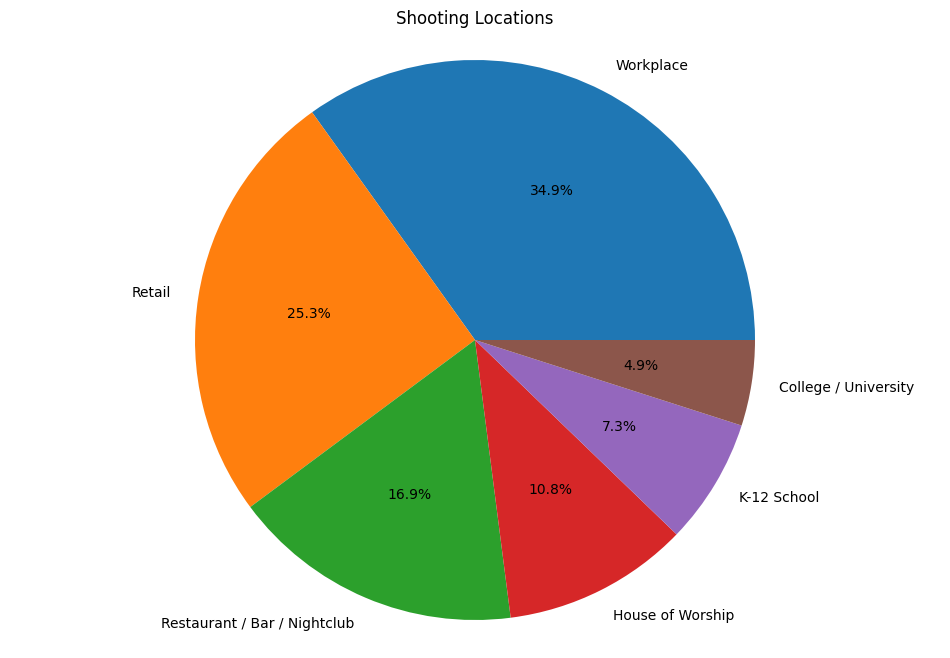

In [ ]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Workplace', 'Retail', 'Restaurant / Bar / Nightclub', 'House of Worship', 'K-12 School', 'College / University']
sizes = [24.0, 17.4, 11.6, 7.4, 5.0, 3.4]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size

# Plot the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Customize the appearance
ax.axis('equal')  # Equal aspect ratio ensures that pie is circular.
ax.set_title('Shooting Locations')

plt.show()

EDA for Trend dataset

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          59 non-null     object 
 1   U.S. Population (Census)                      56 non-null     object 
 2   Total U.S. Murders (FBI UCR)                  57 non-null     object 
 3   U.S. Murder Rate per Million                  56 non-null     float64
 4   Mass Shootings (Incidents)                    56 non-null     float64
 5   Mass Shooting Rate Per Million                56 non-null     float64
 6   Mass Shooting Yearly Growth Rate (Incidents)  54 non-null     float64
 7   Mass Shooting 3 Year Average (Incidents)      52 non-null     float64
 8   Mass Shooting 5 Year Average (Incidents)      50 non-null     float64
 9   Mass Shooting 10 Year Average (Incidents)     45

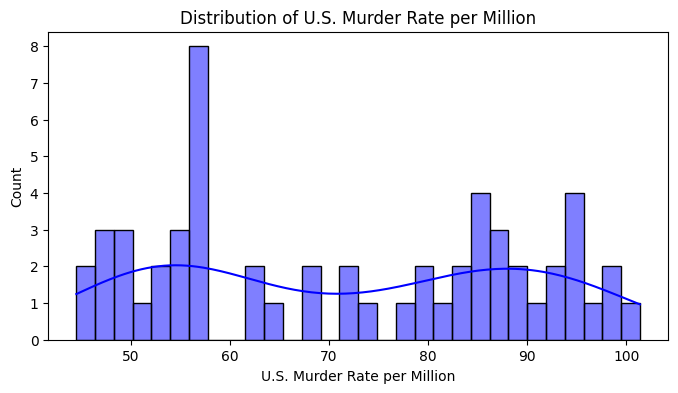

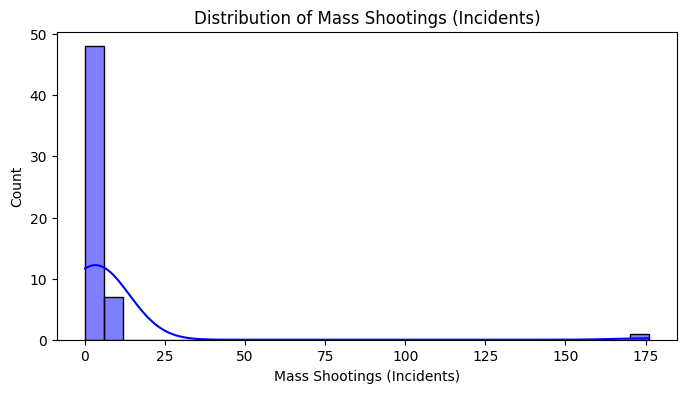

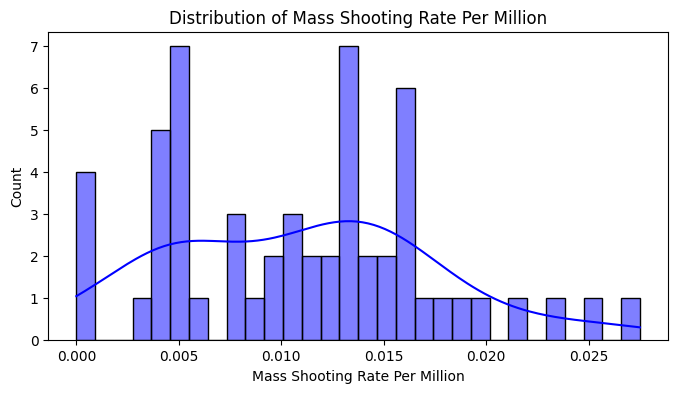

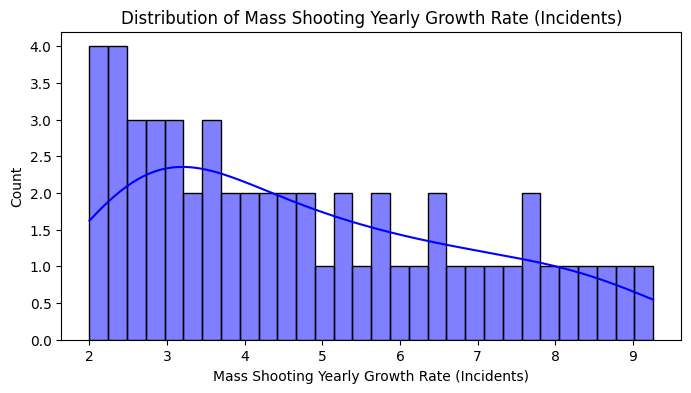

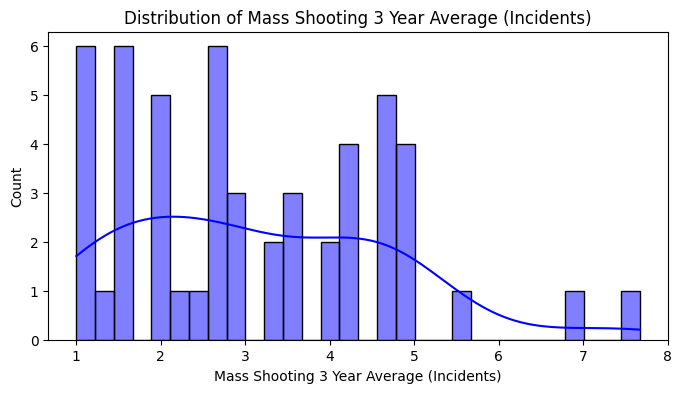

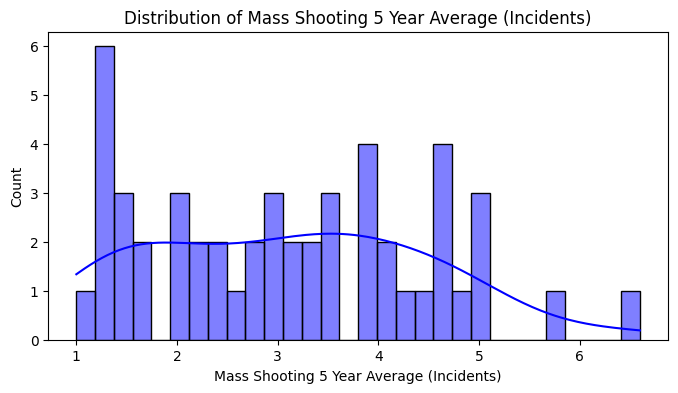

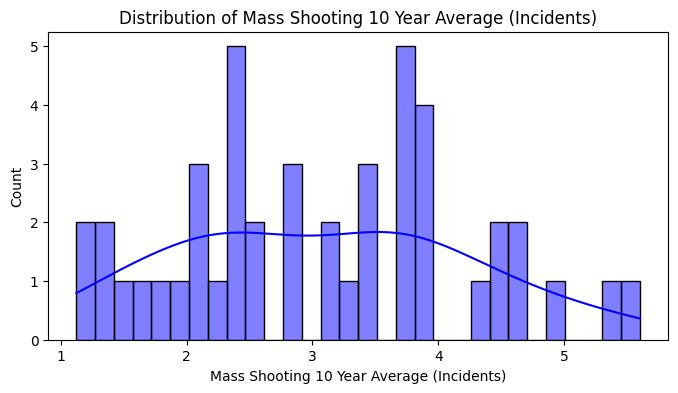

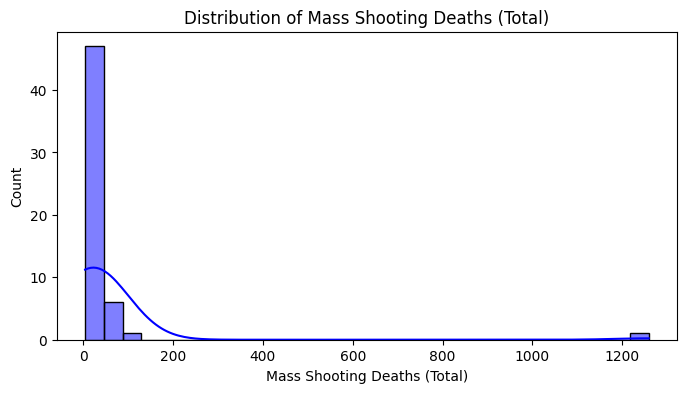

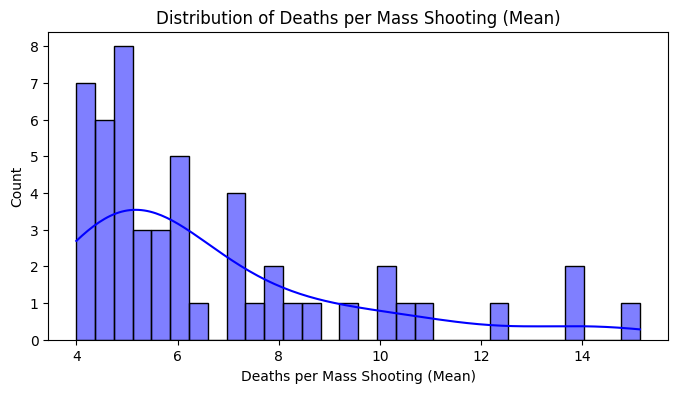

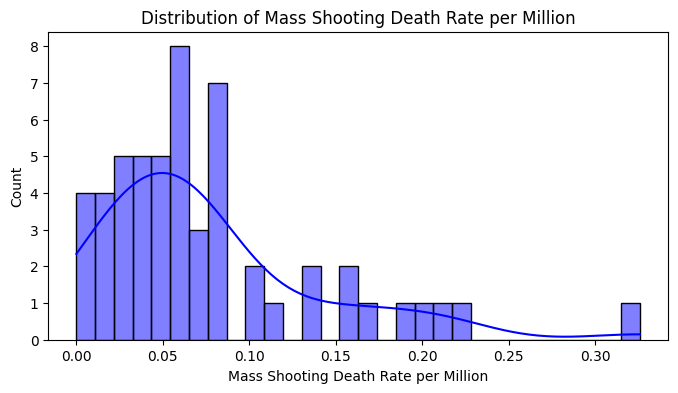

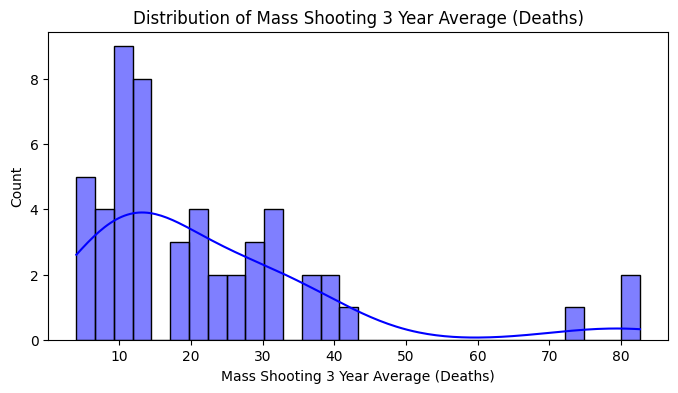

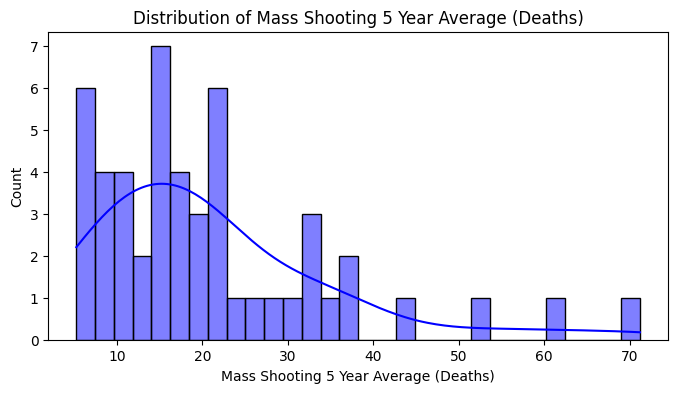

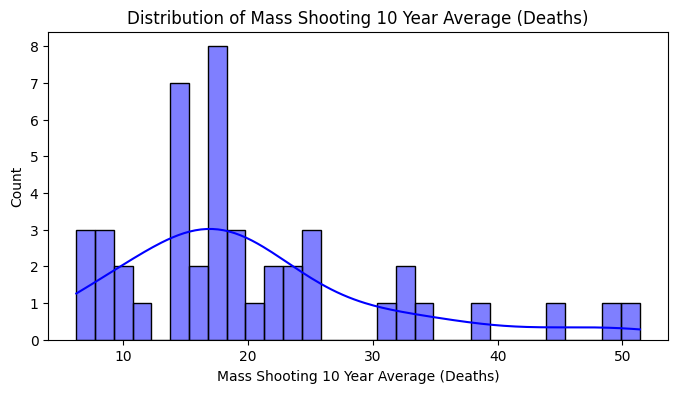

<ipython-input-3-28c3a9a91462>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


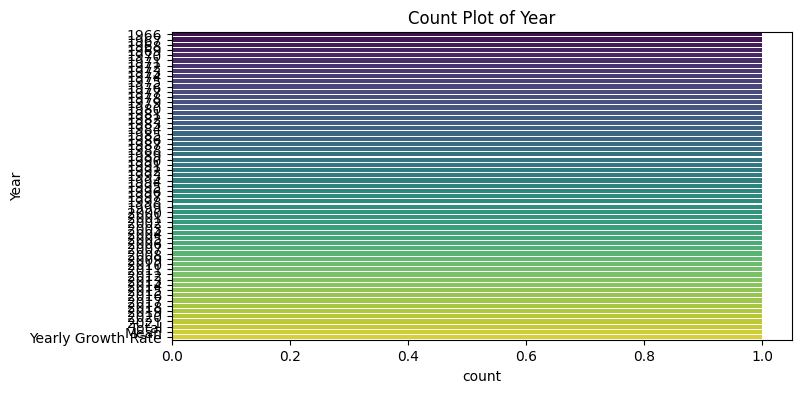

<ipython-input-3-28c3a9a91462>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


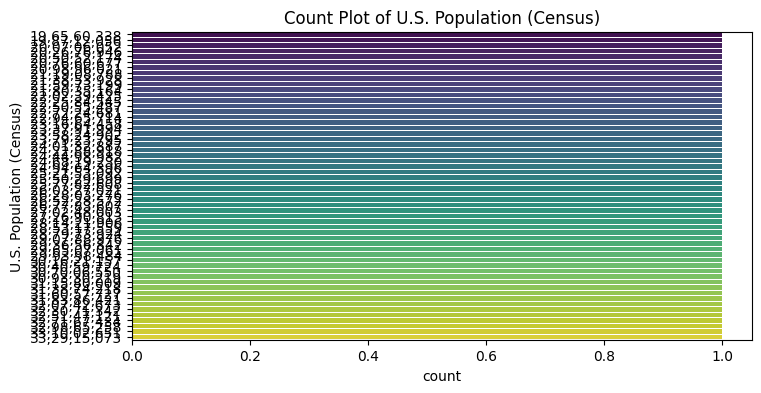

<ipython-input-3-28c3a9a91462>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


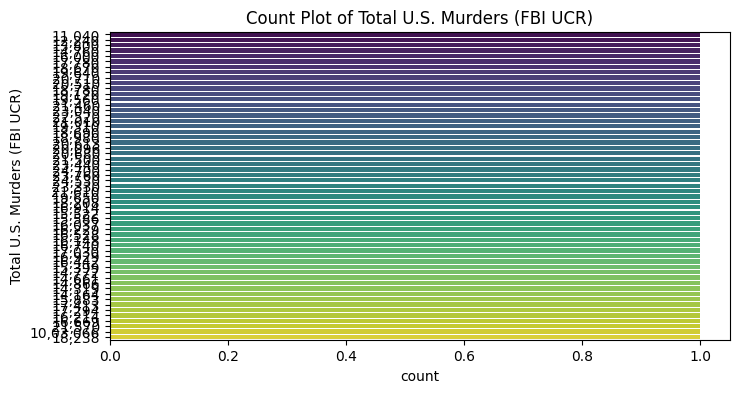

ValueError: could not convert string to float: 'Total'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'Trend_Data.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Basic Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for numerical columns (if there are fewer than 10 numerical columns)
if len(numerical_columns) <= 10:
    sns.pairplot(df[numerical_columns])
    plt.show()

# Boxplots for outlier detection
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Missing value handling (if needed)
# Uncomment below lines if you want to handle missing values
# df = df.dropna()  # Drop rows with missing values
# df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean

# Save cleaned data (optional)
# df.to_csv('/mnt/data/Cleaned_Trend_Data.csv', index=False)

print("EDA is complete.")

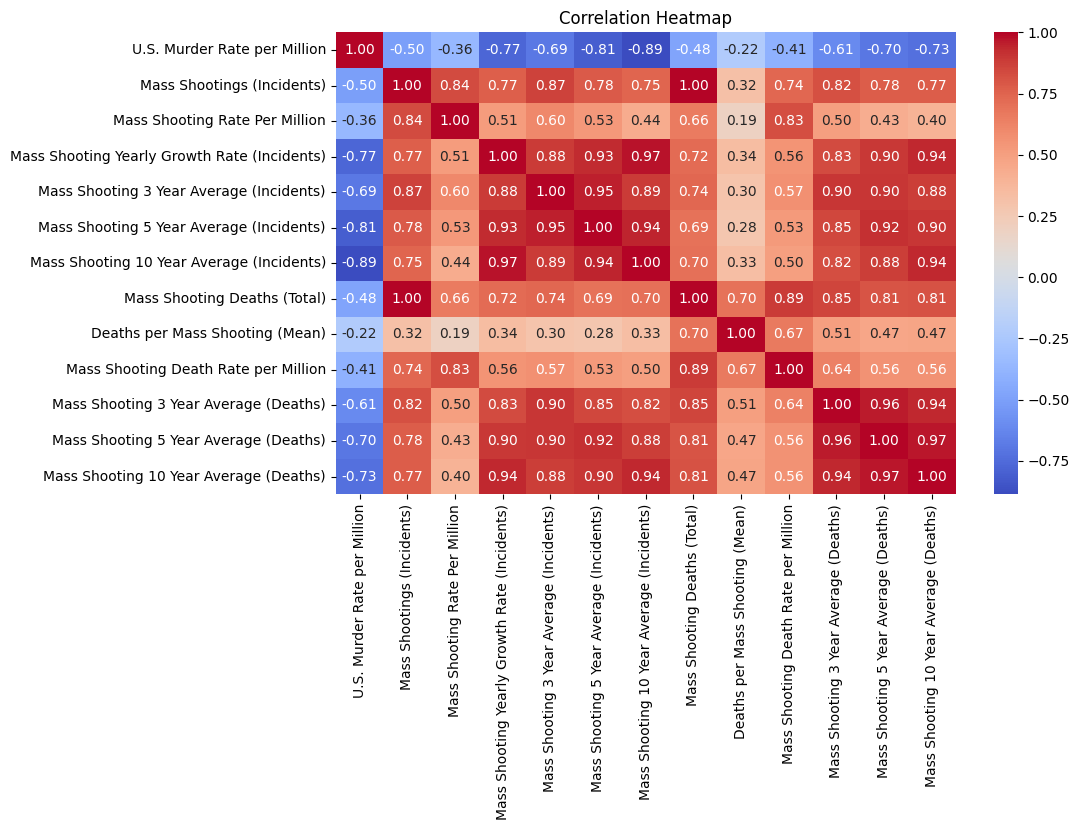

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


EDA FOR VICTIMS DATASET

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Case #                             1267 non-null   object 
 1   Shooter Last Name                  1262 non-null   object 
 2   Shooter First Name                 1262 non-null   object 
 3   Full Date                          1267 non-null   object 
 4   Victim Name                        1267 non-null   object 
 5   Age                                1261 non-null   float64
 6   Gender                             1265 non-null   object 
 7   Race                               1033 non-null   object 
 8   Knew Shooter                       1262 non-null   float64
 9   If Known, Relationship to Shooter  574 non-null    object 
 10  Relationship to Shooter            973 non-null    object 
 11  Life Expectancy                    12

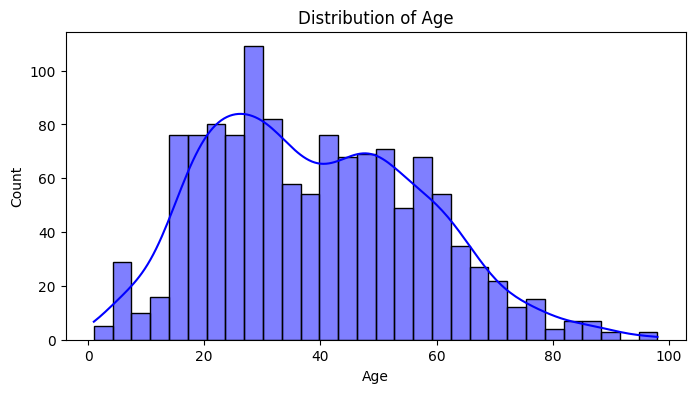

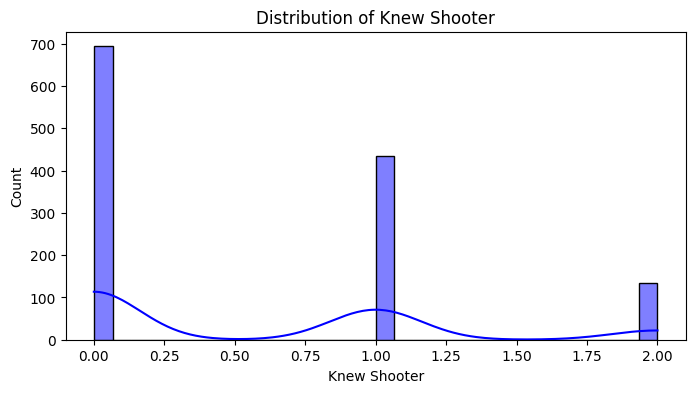

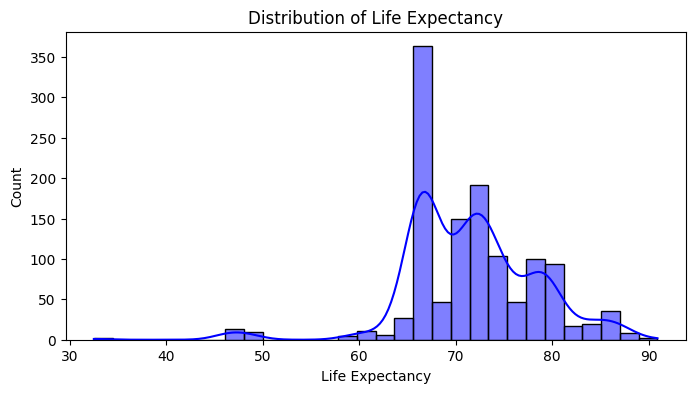

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


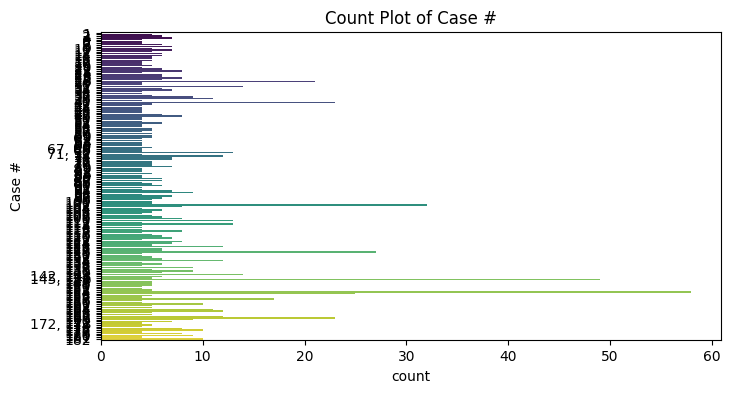

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


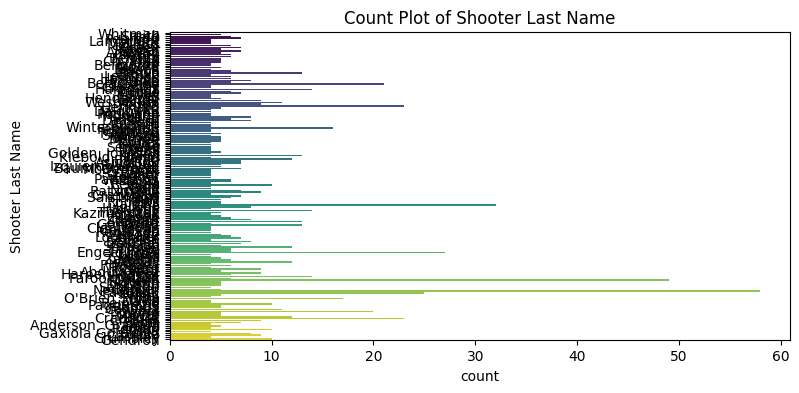

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


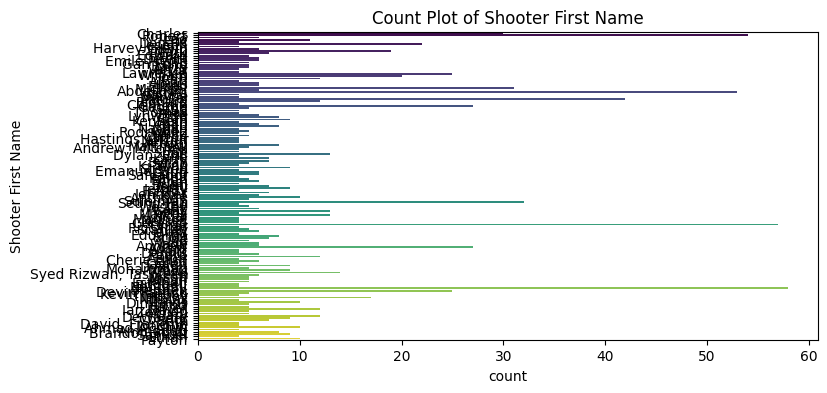

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


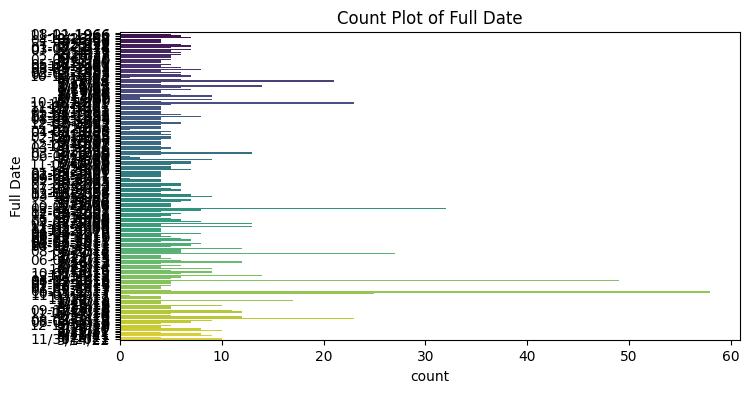

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


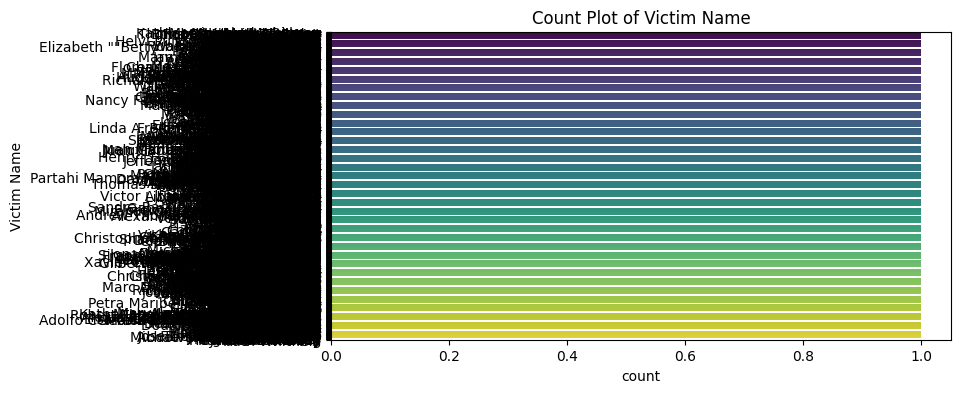

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


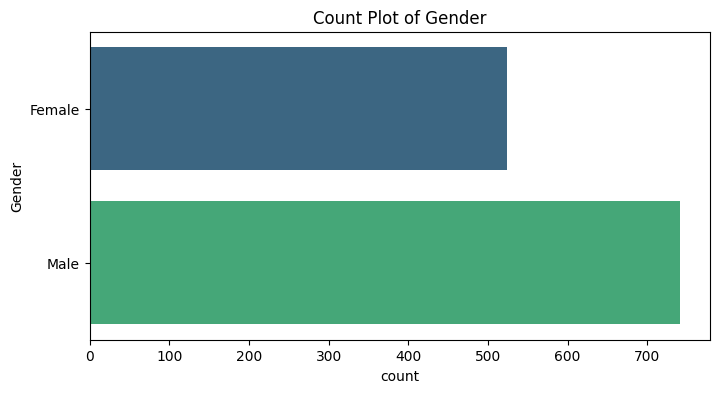

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


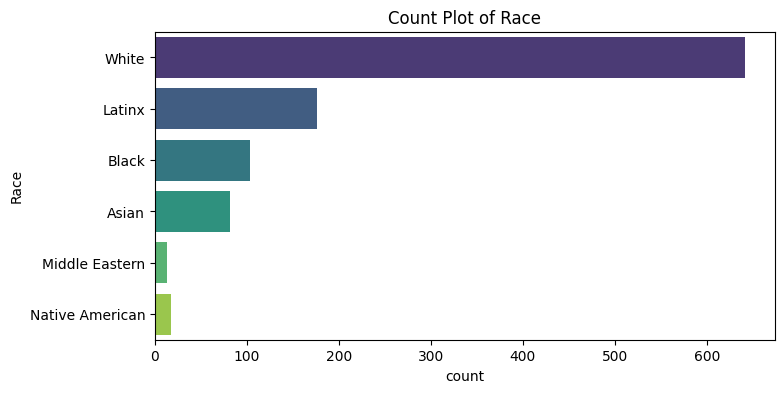

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


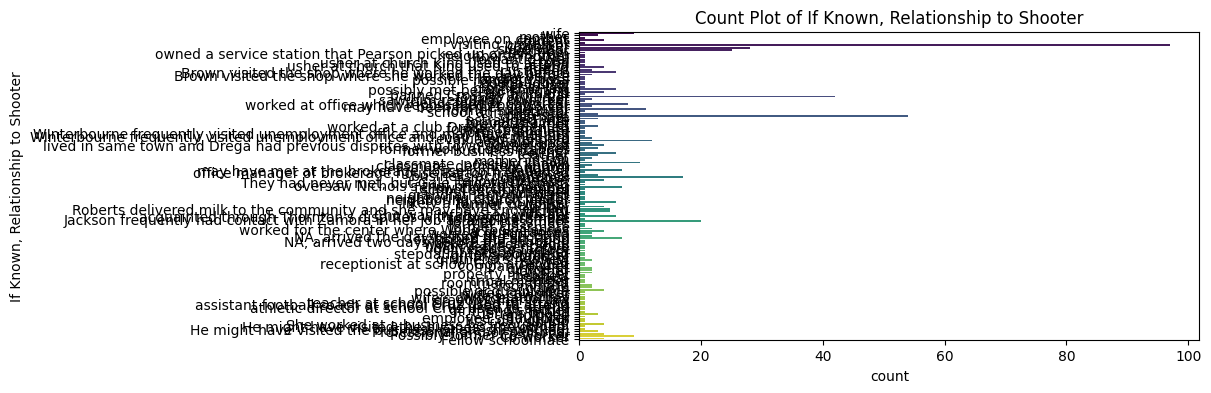

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


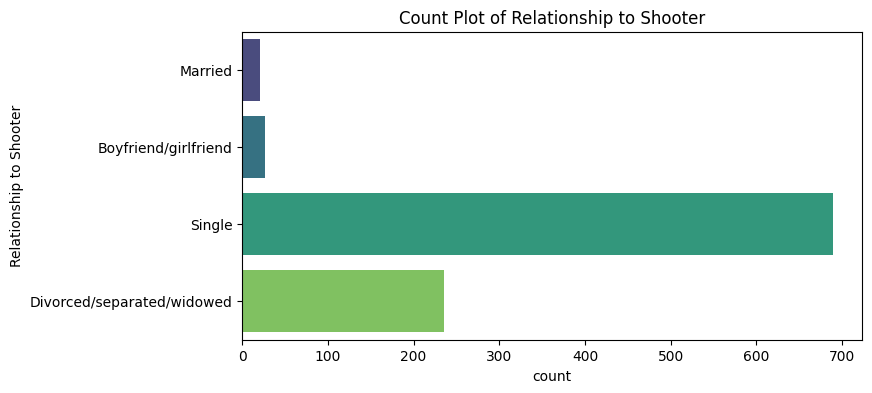

<ipython-input-9-3ab8ae8798a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis')


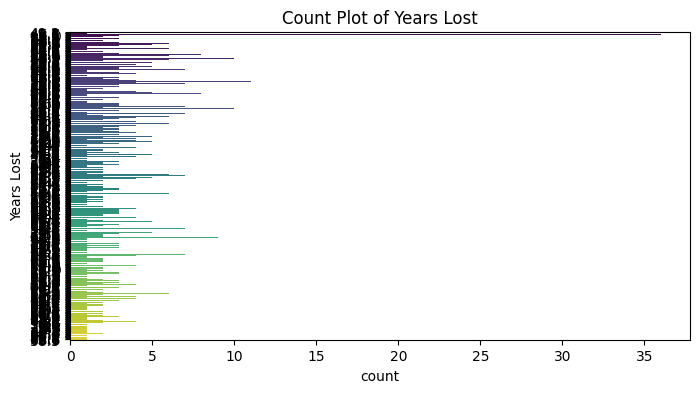

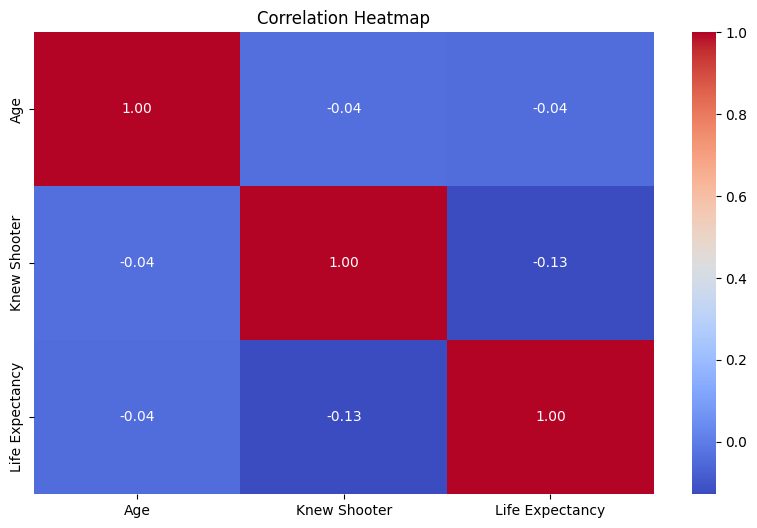

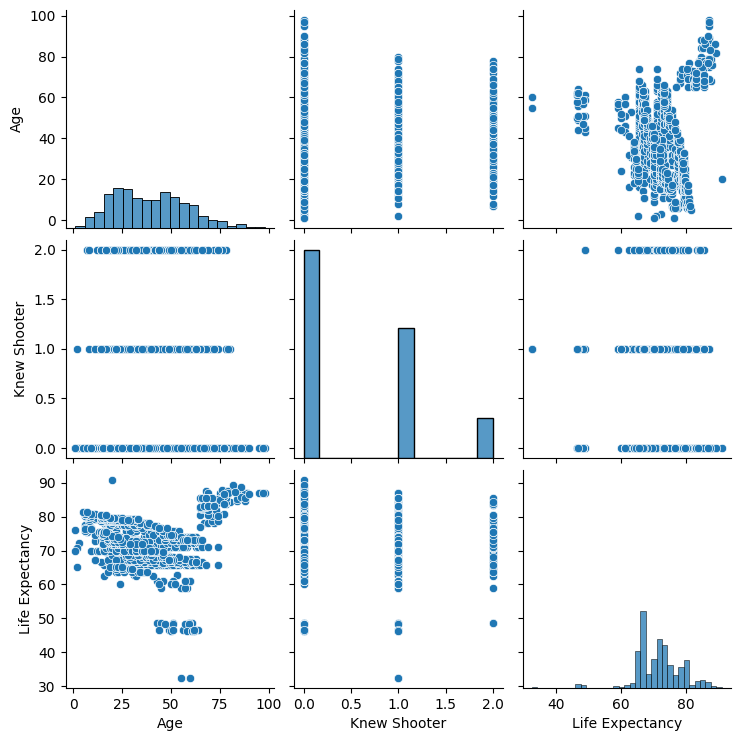

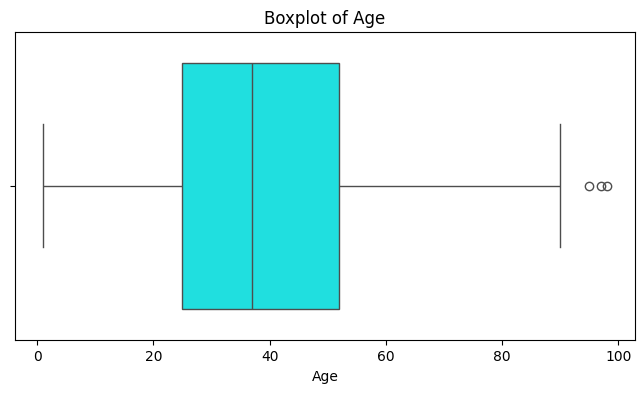

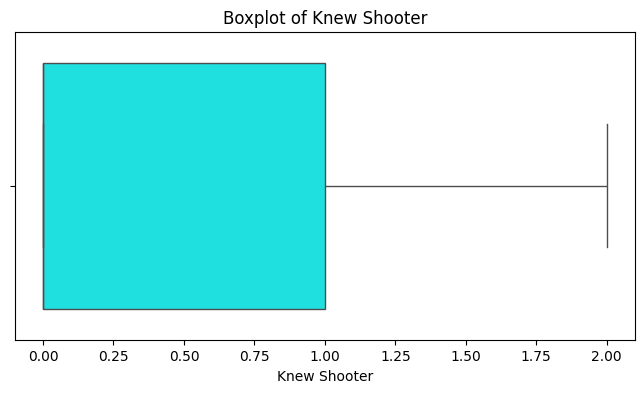

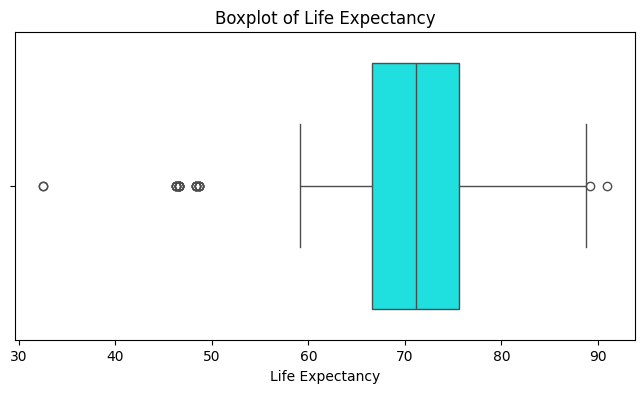

EDA is complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/Modified_Victims_Data.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Basic Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for numerical columns (if there are fewer than 10 numerical columns)
if len(numerical_columns) <= 10:
    sns.pairplot(df[numerical_columns])
    plt.show()

# Boxplots for outlier detection
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Missing value handling (if needed)
# Uncomment below lines if you want to handle missing values
# df = df.dropna()  # Drop rows with missing values
# df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean

# Save cleaned data (optional)
# df.to_csv('/mnt/data/Cleaned_Victims_Data.csv', index=False)

print("EDA is complete.")


EDA for firearm dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Firearms.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Case #,Shooter Last Name,Shooter First Name,Full Date,Make and Model,Classification,Caliber,Used in Shooting?,Modified,Extended Magazine,When Obtained,Legal Purchase,Illegal Purchase,Assembled with Legal Parts,Gifted,Theft,Unknown
0,1,Whitman,Charles,08-01-1966,Remington 700 6mm bolt-action rifle,2.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,Whitman,Charles,08-01-1966,Remington .35-caliber Model 141 pump-action rifle,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,Whitman,Charles,08-01-1966,.30-caliber M1 carbine,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,Whitman,Charles,08-01-1966,6.35mm Galesi-brescia pistol,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,Whitman,Charles,08-01-1966,9mm Luger pistol,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Define mapping dictionaries for replacing numerical codes with categorical labels
mapping_dicts = {
    "Classification": {0: "Handgun", 1: "Shotgun", 2: "Rifle", 3: "Assault weapon"},
    "Caliber": {0: "Small", 1: "Medium", 2: "Large"},
    "Used in Shooting?": {0: "No", 1: "Yes", 2: "Yes (Suicide Attempt Only)"},
    "Modified": {0: "No", 1: "Yes"},
    "Extended Magazine": {0: "No", 1: "Yes"},
    "When Obtained": {0: "Less than one month prior", 1: "More than one month prior"},
    "Legal Purchase": {
        0: "Illegal",
        1: "Licensed Dealer",
        2: "Private Sale",
        3: "Legal, Source Unknown",
    },
    "Illegal Purchase": {
        0: "Legal",
        1: "System Failure",
        2: "Straw Purchase",
        3: "Lying and Buying",
        4: "Illegal Street Sale",
        5: "Illegal, Source Unknown",
        6: "Legal Sale, Illegal Possession",
    },
    "Assembled with Legal Parts ": {0: "No", 1: "Yes"},
    "Gifted": {0: "No", 1: "Yes"},
    "Theft": {
        0: "No",
        1: "Theft/Borrowed from Family or Friend",
        2: "Theft Other",
        3: "Theft at the Scene of the Shooting",
    },
}

# Replace the numbers in the dataset with the corresponding labels
for column, mapping in mapping_dicts.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)

# Display the first few rows of the updated dataset
data.head()
# Save the updated dataset
data.to_csv('Updated_Firearms.csv', index=False)

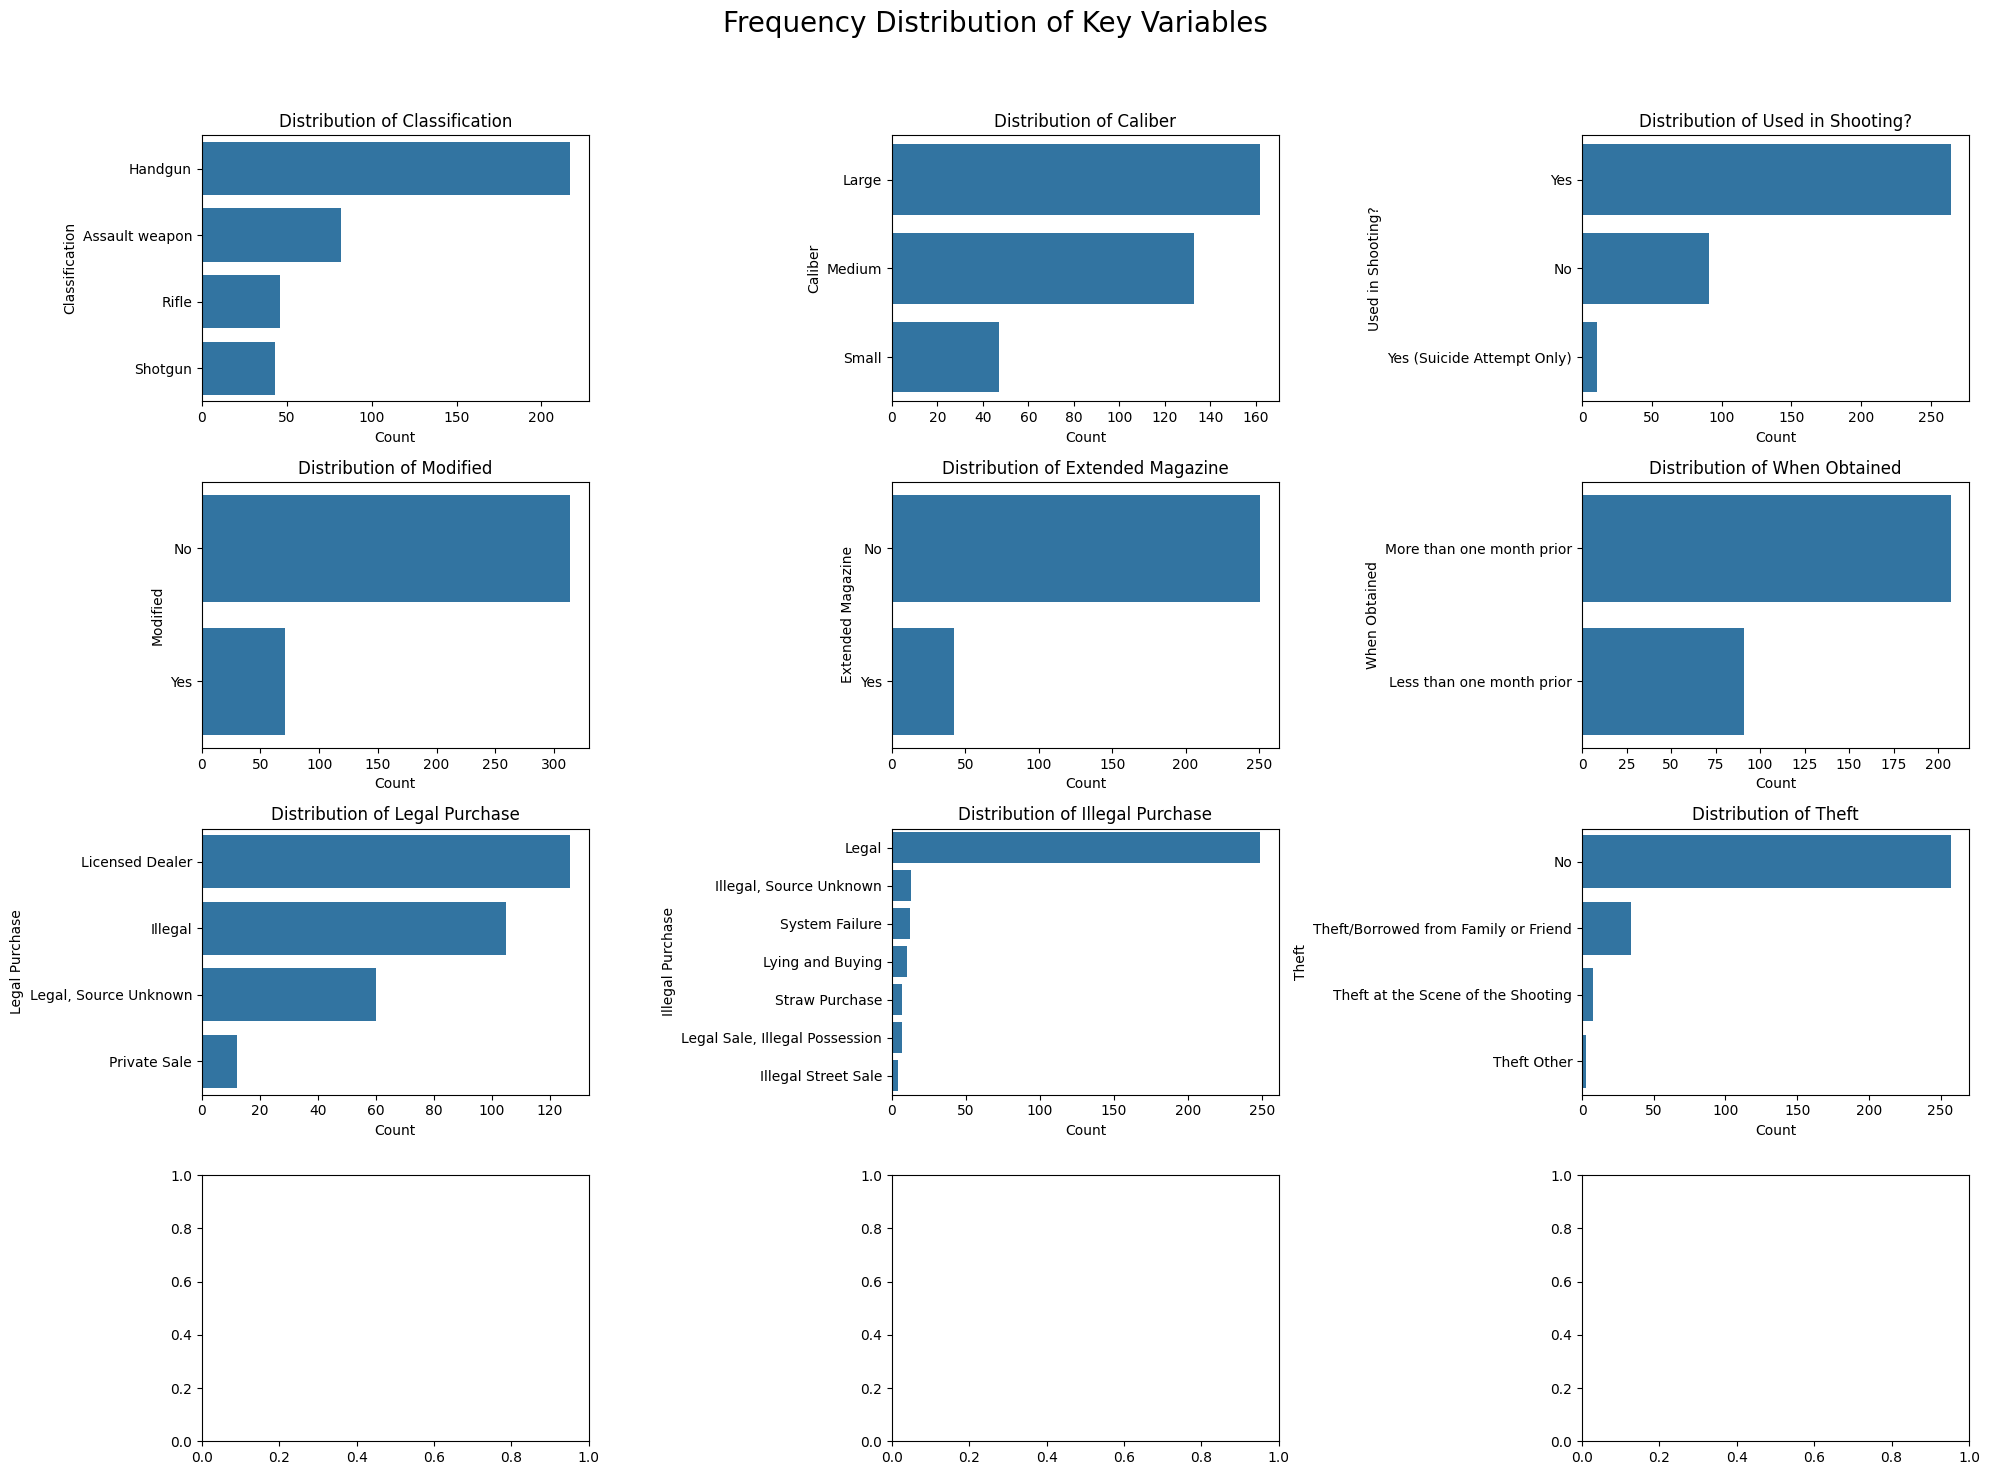

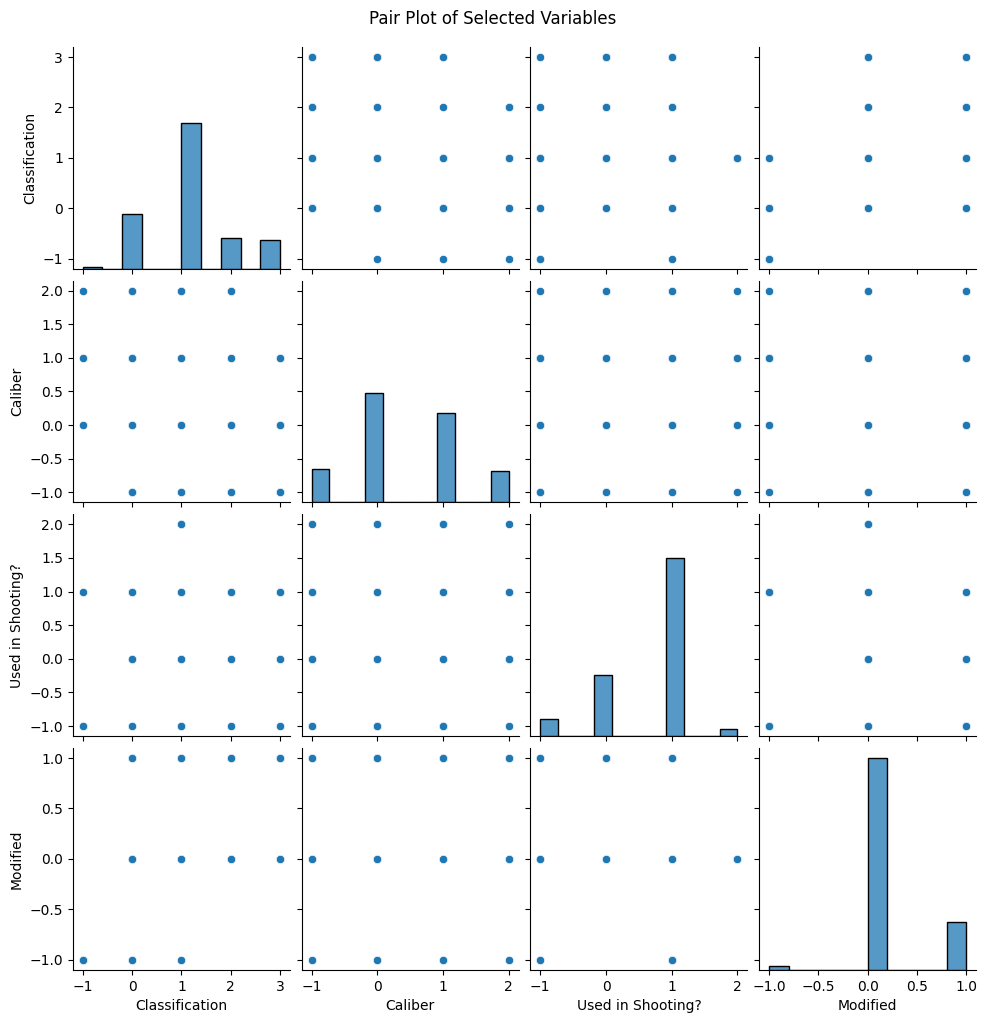

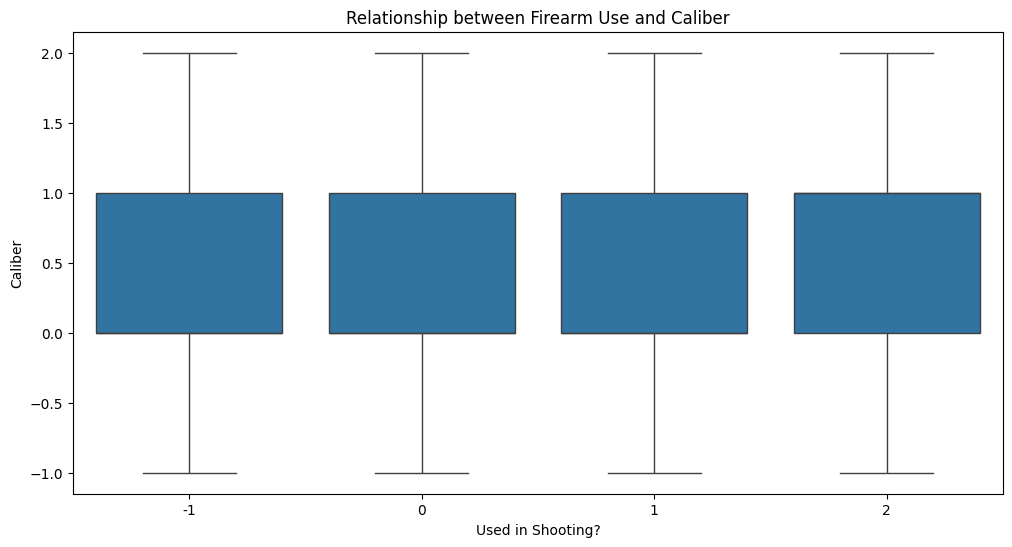

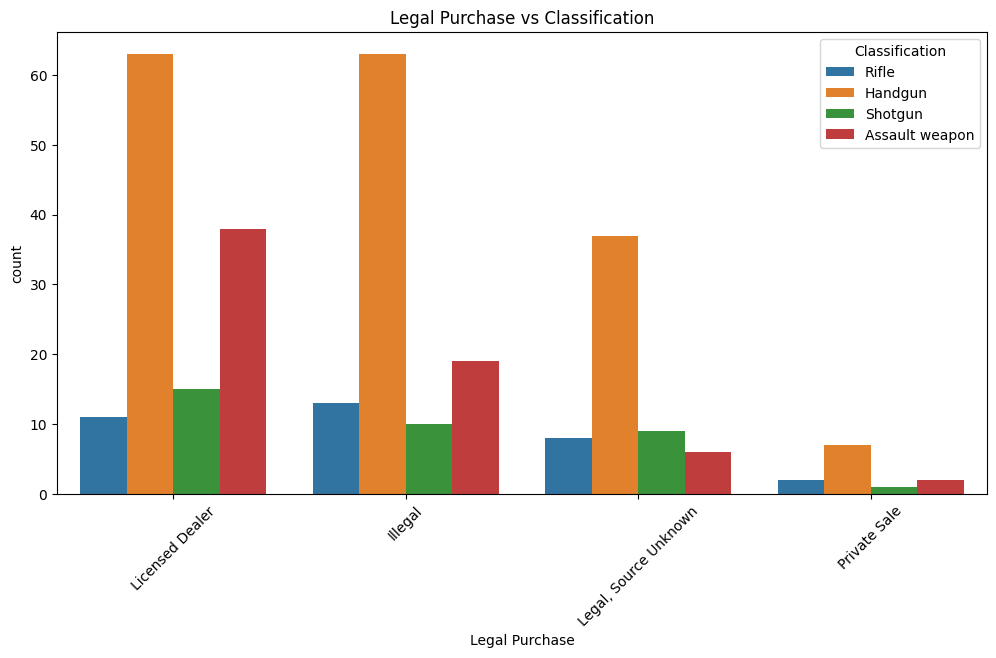

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming the file is already loaded into 'data')
data = pd.read_csv('Firearms.csv')

# Replace numerical codes with categorical labels (update mapping_dicts with appropriate labels)
mapping_dicts = {
    "Classification": {0: "Handgun", 1: "Shotgun", 2: "Rifle", 3: "Assault weapon"},
    "Caliber": {0: "Small", 1: "Medium", 2: "Large"},
    "Used in Shooting?": {0: "No", 1: "Yes", 2: "Yes (Suicide Attempt Only)"},
    "Modified": {0: "No", 1: "Yes"},
    "Extended Magazine": {0: "No", 1: "Yes"},
    "When Obtained": {0: "Less than one month prior", 1: "More than one month prior"},
    "Legal Purchase": {
        0: "Illegal",
        1: "Licensed Dealer",
        2: "Private Sale",
        3: "Legal, Source Unknown",
    },
    "Illegal Purchase": {
        0: "Legal",
        1: "System Failure",
        2: "Straw Purchase",
        3: "Lying and Buying",
        4: "Illegal Street Sale",
        5: "Illegal, Source Unknown",
        6: "Legal Sale, Illegal Possession",
    },
    "Assembled with Legal Parts": {0: "No", 1: "Yes"},
    "Gifted": {0: "No", 1: "Yes"},
    "Theft": {
        0: "No",
        1: "Theft/Borrowed from Family or Friend",
        2: "Theft Other",
        3: "Theft at the Scene of the Shooting",
    },
}

# Apply mappings to the dataset
for column, mapping in mapping_dicts.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)

# Save the updated dataset
data.to_csv('Updated_Firearms.csv', index=False)

# -------------------------- Basic EDA --------------------------

# Frequency distributions for categorical variables
def plot_frequency_distributions(df, columns):
    fig, axes = plt.subplots(len(columns)//3 + 1, 3, figsize=(20, 15))
    fig.suptitle("Frequency Distribution of Key Variables", fontsize=20)

    for col, ax in zip(columns, axes.ravel()):
        if col in df.columns:
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=ax)
            ax.set_title(f"Distribution of {col}")
            ax.set_xlabel("Count")
            ax.set_ylabel(col)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

columns_to_plot = [
    "Classification",
    "Caliber",
    "Used in Shooting?",
    "Modified",
    "Extended Magazine",
    "When Obtained",
    "Legal Purchase",
    "Illegal Purchase",
    "Theft",
]
plot_frequency_distributions(data, columns_to_plot)

# -------------------------- Pair Plot --------------------------

# Pair plot for selected numerical variables
selected_cols = ["Classification", "Caliber", "Used in Shooting?", "Modified"]
sns.pairplot(numerical_data[selected_cols].astype("float"))
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

# -------------------------- Advanced EDA --------------------------

# Relationship between "Used in Shooting?" and other factors
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_data, x="Used in Shooting?", y="Caliber")
plt.title("Relationship between Firearm Use and Caliber")
plt.show()

# Relationship between "Legal Purchase" and "Classification"
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Legal Purchase", hue="Classification")
plt.title("Legal Purchase vs Classification")
plt.xticks(rotation=45)
plt.show()
